# Final project

## Understanding the Dataset and Question

### Data exploration

In [1]:
import sys
import pickle
import matplotlib.pyplot as plt
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi', 'salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 
'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees', 
'to_messages', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

C:\Users\PERELGRITZ_J\AppData\Local\Continuum\anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


#### Total number of data points:

In [2]:
print len(data_dict)

146


#### Allocation across classes:

In [3]:
print len(list(name for name in data_dict.keys() if data_dict[name]["poi"] == 1))

18


#### Number of features used:

In [4]:
features = set()
for name in data_dict.keys():
    for key in data_dict[name].keys():
        features.add(key)

print len(features)

21


#### Features with missing values:

In [23]:
missing_values = {}
for feature in features:
    missing_values[feature] = len(list(name for name in data_dict.keys() if data_dict[name][feature] == 'NaN'))
    
for feature, n in sorted(missing_values.iteritems(), key=lambda (k, v): (v, k), reverse=True):
    print feature, n

loan_advances 142
director_fees 129
restricted_stock_deferred 128
deferral_payments 107
deferred_income 97
long_term_incentive 80
bonus 64
to_messages 60
shared_receipt_with_poi 60
from_this_person_to_poi 60
from_poi_to_this_person 60
from_messages 60
other 53
salary 51
expenses 51
exercised_stock_options 44
restricted_stock 36
email_address 35
total_payments 21
total_stock_value 20
poi 0


### Outlier investigation

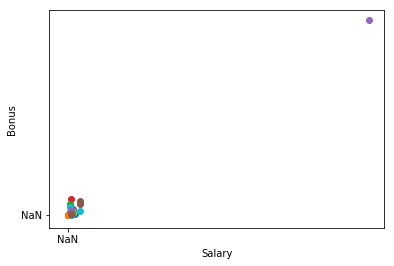

In [26]:
for record in data_dict.items():
    salary = record[1]['salary']
    bonus = record[1]['bonus']
    plt.scatter( salary, bonus )

plt.xlabel("Salary")
plt.ylabel("Bonus")
plt.show()